# EDA
Julian Leonardo Avila Martinez
20212107030

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv"
df = pd.read_csv(url, sep=";")

df.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [99]:
df.shape

(252, 19)

In [100]:
df.columns

Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

The data shows a list of 252 countries with information about certain aspects
such as Name, Capital, Continent, Area, Codes for telephone communication,
shipping, internet extension; Languages spoken on the territory and more.

One can see that the data types seem to be consistent, being quantities the
expected features, one may expect the phone to be a number type, however due
to "+" extension it is treated as an object or string.

There is a big amount of missing data, specially for the postal services.
Some capitals are missing, some continents and neighbours are missing as well
this could be due to being island nation without a clear continent of pertinence
and the lack of land borders with other nations.

Most notably there is one one country that has an equivalent flip code.

In [102]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


The numeric info one has is:
- Area - Land are by its territory
- GeoName ID - Number that identifies the location
- Numeric - Numeric code that identifies country for communications
- Population - Amount of inhabitants

Due to the nature of the data, the only ones that could be related are the
area and the population, as countries with larger area are more likely to have
a bigger population.

In [103]:
df_numeric = df[["area", "geoname_id", "numeric", "population"]]
df_numeric

,area,geoname_id,numeric,population
0,468.0,3041565,20,84000
1,82880.0,290557,784,4975593
2,647500.0,1149361,4,29121286
3,443.0,3576396,28,86754
4,102.0,3573511,660,13254
...,...,...,...,...
247,1219912.0,953987,710,49000000
248,752614.0,895949,894,13460305
249,390580.0,878675,716,13061000
250,102350.0,8505033,891,10829175


In [104]:
corr_var = df_numeric.corr()
print(corr_var)

                area  geoname_id   numeric  population
area        1.000000    0.120399 -0.089264    0.412864
geoname_id  0.120399    1.000000  0.038707   -0.066105
numeric    -0.089264    0.038707  1.000000   -0.041140
population  0.412864   -0.066105 -0.041140    1.000000


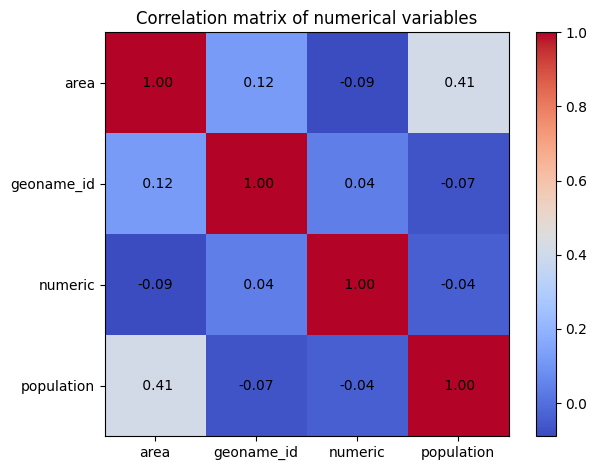

In [105]:
plt.imshow(corr_var, cmap="coolwarm", interpolation="none")
plt.colorbar()

plt.xticks(np.arange(len(corr_var.columns)), corr_var.columns)
plt.yticks(np.arange(len(corr_var.columns)), corr_var.columns)

for i in range(len(corr_var.columns)):
    for j in range(len(corr_var.columns)):
        plt.text(j, i, f"{corr_var.iloc[i, j] : .2f}", ha="center", va="center", color="black")

plt.title("Correlation matrix of numerical variables")
plt.tight_layout()

As it was expected, there is no high correlation of variables, being areas and
population the closest related by a 0.41 metric. As mentioned before, the
higher area allows for a higher population, however due to some countries being
huge area but not being densely populate as the (US, China, Russia, Canada),
the correlation is less than 5.0.

# Population Growth

In [106]:
url_pop = "https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv"
df_pop = pd.read_csv(url_pop, sep=",")
df_pop.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [107]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [108]:
df_pop_es = df_pop[df_pop["country"] == "Spain"]
df_pop_es.head()

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161


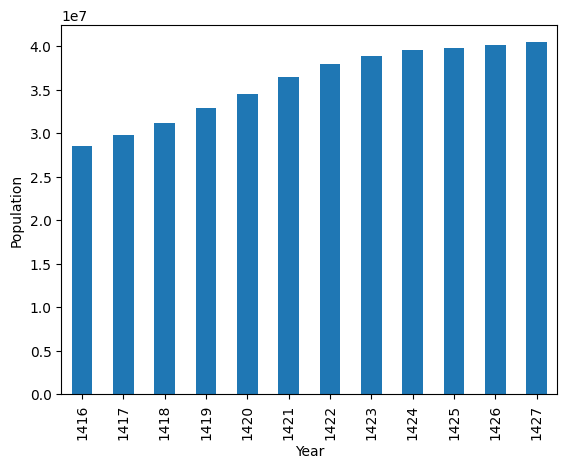

In [109]:
df_pop_es["population"].plot.bar()
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

In [110]:
df_pop_esar = df_pop[df_pop["country"].isin(["Argentina", "Spain"])]
df_pop_esar.head()

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


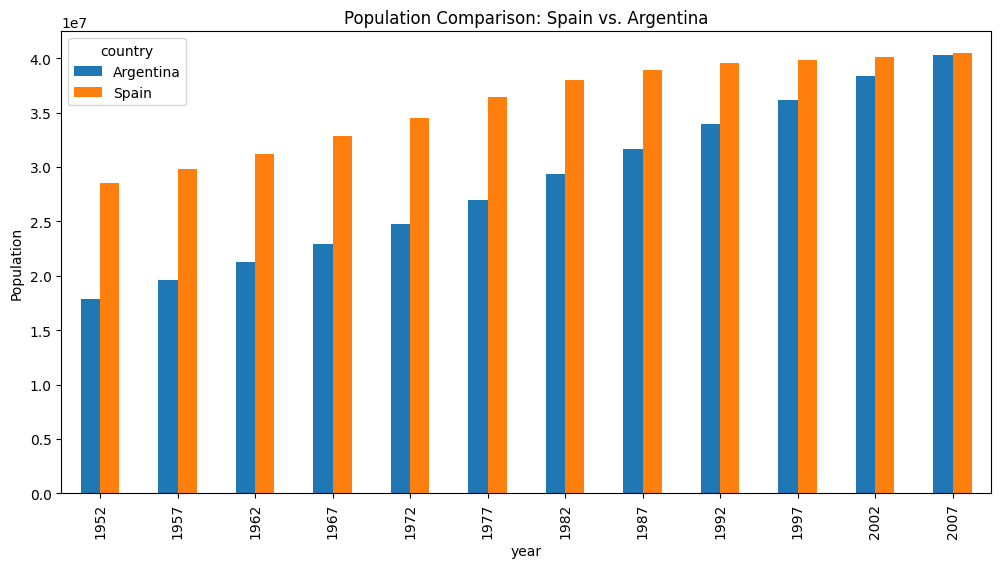

In [111]:
pivoted = df_pop_esar.pivot(index='year', columns='country', values='population')
pivoted.plot.bar(figsize=(12, 6))
plt.title('Population Comparison: Spain vs. Argentina')
plt.ylabel('Population')
plt.show()

The graph allows to see the population growth of Spain and Argentina,
while in 1952 the difference is less than half of Spain population, on 2007
that difference decreases by a lot.
It shows how the population growth Argentina experienced was bigger than Spain's

In [112]:
df_es = df[df["languages"].notnull() & df["languages"].str.startswith("es")]
df_es = df_es[["name", "population"]]
df_es.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 9 to 238
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        20 non-null     object
 1   population  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [113]:
df_es.head(20)

,name,population
9,Argentina,41343201
28,Bolivia,9947418
45,Chile,16746491
48,Colombia,47790000
49,Costa Rica,4516220
50,Cuba,11423000
60,Dominican Republic,9823821
62,Ecuador,14790608
67,Spain,46505963
87,Equatorial Guinea,1014999


In [114]:
df_pop_sp = df_pop[df_pop["country"].isin(df_es["name"])]
df_pop_sp.head(20)

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799
53,Argentina,1977,26983828
54,Argentina,1982,29341374
55,Argentina,1987,31620918
56,Argentina,1992,33958947
57,Argentina,1997,36203463


In [115]:
df_pop_sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 48 to 1643
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     240 non-null    object
 1   year        240 non-null    int64 
 2   population  240 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.5+ KB


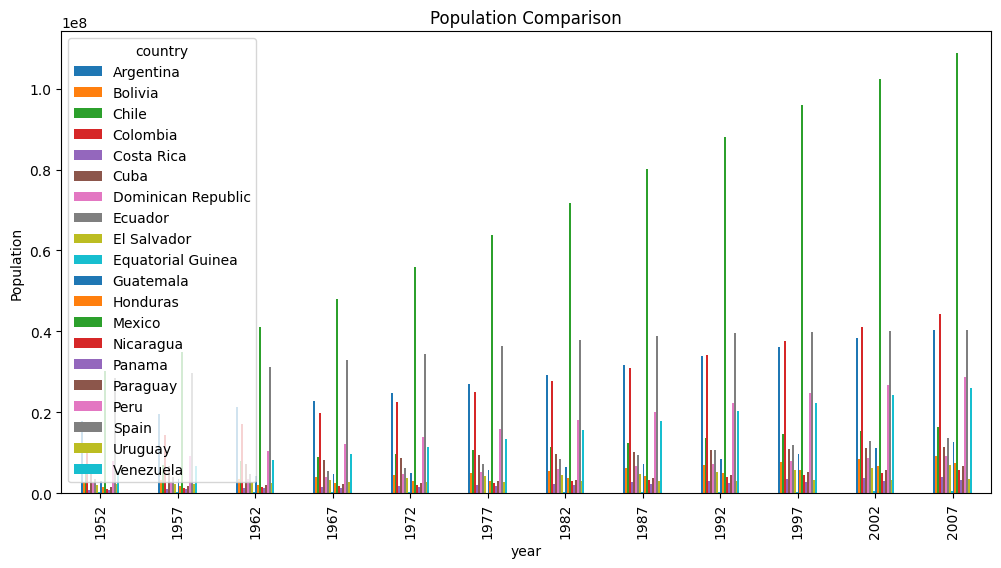

In [116]:
pivoted = df_pop_sp.pivot(index='year', columns='country', values='population')
pivoted.plot.bar(figsize=(12, 6))
plt.title('Population Comparison')
plt.ylabel('Population')
plt.show()

The graph is not clear to distinguished, as Chile or Mexico seem to have a
bigger population than the rest of countries.

In [117]:
df_pop_sp.head(20)

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799
53,Argentina,1977,26983828
54,Argentina,1982,29341374
55,Argentina,1987,31620918
56,Argentina,1992,33958947
57,Argentina,1997,36203463


In [118]:
pivoted.head(20)

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,Ecuador,El Salvador,Equatorial Guinea,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Spain,Uruguay,Venezuela
year,,,,,,,,,,,,,,,,,,,,
1952,17876956,2883315,6377619,12350771,926317,6007797,2491346,3548753,2042865,216964,3146381,1517453,30144317,1165790,940080,1555876,8025700,28549870,2252965,5439568
1957,19610538,3211738,7048426,14485993,1112300,6640752,2923186,4058385,2355805,232922,3640876,1770390,35015548,1358828,1063506,1770902,9146100,29841614,2424959,6702668
1962,21283783,3593918,7961258,17009885,1345187,7254373,3453434,4681707,2747687,249220,4208858,2090162,41121485,1590597,1215725,2009813,10516500,31158061,2598466,8143375
1967,22934225,4040665,8858908,19764027,1588717,8139332,4049146,5432424,3232927,259864,4690773,2500689,47995559,1865490,1405486,2287985,12132200,32850275,2748579,9709552
1972,24779799,4565872,9717524,22542890,1834796,8831348,4671329,6298651,3790903,277603,5149581,2965146,55984294,2182908,1616384,2614104,13954700,34513161,2829526,11515649
1977,26983828,5079716,10599793,25094412,2108457,9537988,5302800,7278866,4282586,192675,5703430,3055235,63759976,2554598,1839782,2984494,15990099,36439000,2873520,13503563
1982,29341374,5642224,11487112,27764644,2424367,9789224,5968349,8365850,4474873,285483,6395630,3669448,71640904,2979423,2036305,3366439,18125129,37983310,2953997,15620766
1987,31620918,6156369,12463354,30964245,2799811,10239839,6655297,9545158,4842194,341244,7326406,4372203,80122492,3344353,2253639,3886512,20195924,38880702,3045153,17910182
1992,33958947,6893451,13572994,34202721,3173216,10723260,7351181,10748394,5274649,387838,8486949,5077347,88111030,4017939,2484997,4483945,22430449,39549438,3149262,20265563


In [120]:
pivoted_year = df_pop_sp.pivot(index='country', columns='year', values='population')
pivoted_year.head(20)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Argentina,17876956,19610538,21283783,22934225,24779799,26983828,29341374,31620918,33958947,36203463,38331121,40301927
Bolivia,2883315,3211738,3593918,4040665,4565872,5079716,5642224,6156369,6893451,7693188,8445134,9119152
Chile,6377619,7048426,7961258,8858908,9717524,10599793,11487112,12463354,13572994,14599929,15497046,16284741
Colombia,12350771,14485993,17009885,19764027,22542890,25094412,27764644,30964245,34202721,37657830,41008227,44227550
Costa Rica,926317,1112300,1345187,1588717,1834796,2108457,2424367,2799811,3173216,3518107,3834934,4133884
Cuba,6007797,6640752,7254373,8139332,8831348,9537988,9789224,10239839,10723260,10983007,11226999,11416987
Dominican Republic,2491346,2923186,3453434,4049146,4671329,5302800,5968349,6655297,7351181,7992357,8650322,9319622
Ecuador,3548753,4058385,4681707,5432424,6298651,7278866,8365850,9545158,10748394,11911819,12921234,13755680
El Salvador,2042865,2355805,2747687,3232927,3790903,4282586,4474873,4842194,5274649,5783439,6353681,6939688


In [121]:
pivoted_year.describe()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,6.873035e+06,7.720772e+06,8.711675e+06,9.824341e+06,1.103181e+07,1.225824e+07,1.351574e+07,1.484830e+07,1.621718e+07,1.755446e+07,1.878476e+07,1.995239e+07
std,8.813961e+06,9.764960e+06,1.093583e+07,1.230518e+07,1.390012e+07,1.553557e+07,1.717499e+07,1.890075e+07,2.053126e+07,2.212915e+07,2.350813e+07,2.482192e+07
min,2.169640e+05,2.329220e+05,2.492200e+05,2.598640e+05,2.776030e+05,1.926750e+05,2.854830e+05,3.412440e+05,3.878380e+05,4.399710e+05,4.956270e+05,5.512010e+05
25%,1.546270e+06,1.770774e+06,2.070075e+06,2.447513e+06,2.775670e+06,2.956750e+06,3.269685e+06,3.750972e+06,4.367444e+06,5.017985e+06,5.700080e+06,6.419199e+06
50%,3.014848e+06,3.426307e+06,3.901388e+06,4.369960e+06,4.910455e+06,5.503115e+06,6.181990e+06,6.990852e+06,7.919065e+06,8.898116e+06,9.914486e+06,1.036830e+07
75%,6.789639e+06,7.572844e+06,8.736656e+06,1.031521e+07,1.212541e+07,1.412520e+07,1.624686e+07,1.848162e+07,2.080678e+07,2.296783e+07,2.490811e+07,2.673219e+07
max,3.014432e+07,3.501555e+07,4.112148e+07,4.799556e+07,5.598429e+07,6.375998e+07,7.164090e+07,8.012249e+07,8.811103e+07,9.589515e+07,1.024799e+08,1.087009e+08


<Axes: >

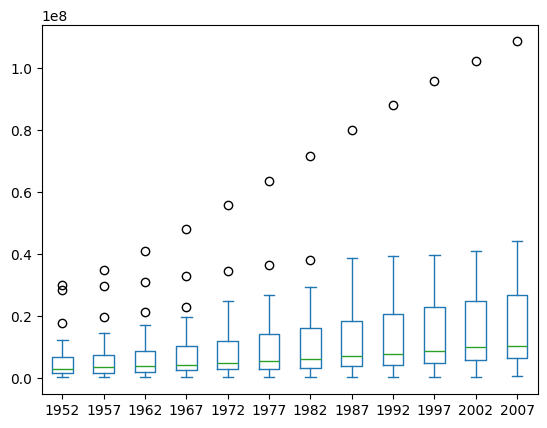

In [126]:
pivoted_year.plot.box()

In [130]:
df_without_outliers = pivoted_year.copy()
for column in pivoted_year.columns:
    mean = pivoted_year[column].mean()
    std_dev = pivoted_year[column].std()
    threshold = 2 * std_dev

    mask = (pivoted_year[column] < mean - threshold) | (pivoted_year[column] > mean + threshold)

    df_without_outliers.loc[mask, column] = pd.NA

df_without_outliers.head(20)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Argentina,17876956.0,19610538.0,21283783.0,22934225.0,24779799.0,26983828.0,29341374.0,31620918.0,33958947.0,36203463.0,38331121.0,40301927.0
Bolivia,2883315.0,3211738.0,3593918.0,4040665.0,4565872.0,5079716.0,5642224.0,6156369.0,6893451.0,7693188.0,8445134.0,9119152.0
Chile,6377619.0,7048426.0,7961258.0,8858908.0,9717524.0,10599793.0,11487112.0,12463354.0,13572994.0,14599929.0,15497046.0,16284741.0
Colombia,12350771.0,14485993.0,17009885.0,19764027.0,22542890.0,25094412.0,27764644.0,30964245.0,34202721.0,37657830.0,41008227.0,44227550.0
Costa Rica,926317.0,1112300.0,1345187.0,1588717.0,1834796.0,2108457.0,2424367.0,2799811.0,3173216.0,3518107.0,3834934.0,4133884.0
Cuba,6007797.0,6640752.0,7254373.0,8139332.0,8831348.0,9537988.0,9789224.0,10239839.0,10723260.0,10983007.0,11226999.0,11416987.0
Dominican Republic,2491346.0,2923186.0,3453434.0,4049146.0,4671329.0,5302800.0,5968349.0,6655297.0,7351181.0,7992357.0,8650322.0,9319622.0
Ecuador,3548753.0,4058385.0,4681707.0,5432424.0,6298651.0,7278866.0,8365850.0,9545158.0,10748394.0,11911819.0,12921234.0,13755680.0
El Salvador,2042865.0,2355805.0,2747687.0,3232927.0,3790903.0,4282586.0,4474873.0,4842194.0,5274649.0,5783439.0,6353681.0,6939688.0


After removing the outliers, it can be seen that it was indeed Mexico the one
much higher that the others in terms on population.
However, Spain was also an outlier on three occasions.

<Axes: >

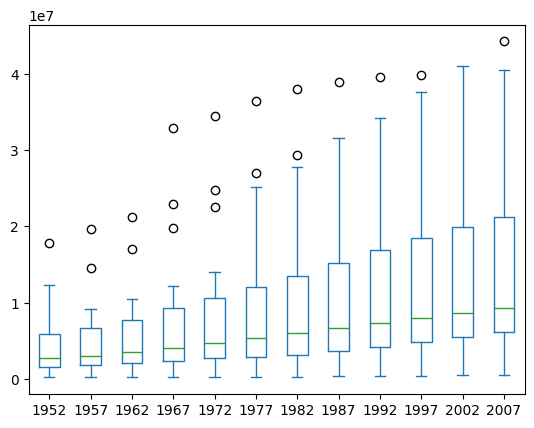

In [131]:
df_without_outliers.plot.box()

# Categoric Data

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [132]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB
